In [1]:
# import du dossier de travail
import sys
sys.path.insert(0,"/home/apprenant/PycharmProjects/ACP-vehicules")

# import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Import des données

In [2]:
X = pd.read_excel("../data/initial_data.xls", sheet_name = 0, header = 0, index_col = 0) # on met l'index sur la col string

In [4]:
# il faut supprimer des colonnes pour coller à l'exemple du pdf mais il sera possible de revenir sur les data et de faire de l'encodage par la suite.
X=X.drop(['FINITION', 'PRIX', 'R-POID.PUIS'], axis=1)

In [5]:
X.shape

(18, 6)

In [6]:
# sauvegarde des infos

# nb d'observations (lignes)
n = X.shape[0]

# nb de variables (col)
p = X.shape[1]


# 2. Préparation des données

## 1. Centrer et réduire (obligatoire)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
Z = scaler.fit_transform(X)

In [9]:
# moyennes pour chaque colonne
np.mean(Z, axis = 0)

array([-2.22044605e-16, -1.41861831e-16,  0.00000000e+00,  1.86270752e-15,
        5.73615229e-16,  5.55111512e-16])

In [10]:
# écarts types pour chaque colonne
np.std(Z, axis = 0)

array([1., 1., 1., 1., 1., 1.])

grâce à ces manipulations, nos données sont centrées autour d'une moyenne à zéro et sont toutes comprises entre -1 et 1 ce qui est necessaire à l'ACP

# 3. ACP : analyse en composante principale

In [11]:
# import de la classe
from sklearn.decomposition import PCA

In [12]:
# Instanciation
pca = PCA(svd_solver  =  'full')

In [13]:
# Affichage des paramètres par défaut
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'full',
 'tol': 0.0,
 'whiten': False}

In [14]:
# calculs 
coord = pca.fit_transform(Z)

In [15]:
print(pca.n_components_)# par défaut le nb de components est le nombre de variables

6


In [16]:
# variance expliquée
v = pca.explained_variance_

In [17]:
# variance corrigée (eigenvalue = valeur propre)
eigval = (n-1)/n*v

In [18]:
eigval

array([4.42085806, 0.85606229, 0.37306608, 0.21392209, 0.09280121,
       0.04329027])

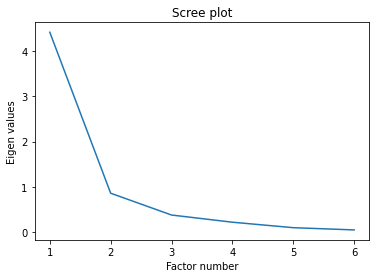

In [19]:
#screeplot (éboulis des valeurs propres)

plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

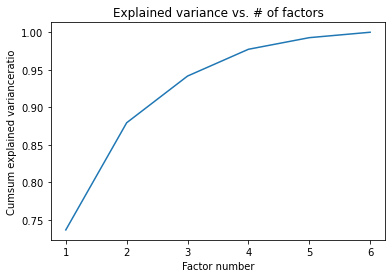

In [20]:
# cumul de variance expliquée

plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained varianceratio")
plt.xlabel("Factor number")
plt.show()

grâce à ce graphique des cumuls de variances expliquées on peut déduire un nombre de CP optimal à 3, ce qui correspond à 95% de l'information

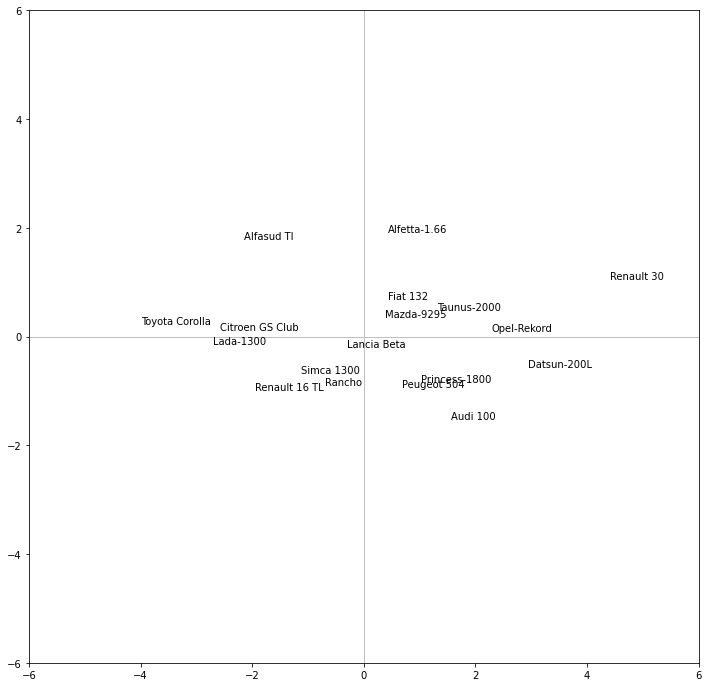

In [23]:
#positionnement des individus dans lepremier plan
fig, axes = plt.subplots(figsize=(12,12))

axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
    
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

Ce graphique place nos individus sur un plan 2D, cela nous permet d'observer que la renault30 et la toyota corolla sont 2 individus "extremes" de notre jeu de données
c'est à dire que ces 2 individus sont fortement dissemblable.
Mais nous ne savons pas encore selon quels critères (quelles variables?)

In [24]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

                 ID        d_i
0        Alfasud TI   8.225176
1          Audi 100   6.673755
2        Simca 1300   2.159327
3   Citroen GS Club   6.780145
4          Fiat 132   1.169124
5       Lancia Beta   1.134950
6       Peugeot 504   1.512793
7     Renault 16 TL   5.636826
8        Renault 30  21.789657
9    Toyota Corolla  16.290143
10     Alfetta-1.66   4.456770
11    Princess-1800   1.952513
12      Datsun-200L  11.112624
13      Taunus-2000   2.452986
14           Rancho   1.963373
15       Mazda-9295   0.684521
16      Opel-Rekord   6.083119
17        Lada-1300   7.922198


Concrètement, la Renault 30 et la Toyota Corolla sont les deux véhicules qui se démarquent le  plus  des  autres ce sont des individus "extremes"

In [50]:
#qualité de représentation des individus -COS2
PC = coord**2
for j in range(p):
    PC[:,j] = PC[:,j]/di
print(pd.DataFrame({'id':X.index,'PC_1':PC[:,0],'PC_2':PC[:,1]}))

                 id      PC_1      PC_2
0        Alfasud TI  0.556218  0.387670
1          Audi 100  0.365334  0.349406
2        Simca 1300  0.580284  0.210694
3   Citroen GS Club  0.976992  0.001879
4          Fiat 132  0.156579  0.413826
5       Lancia Beta  0.081555  0.033900
6       Peugeot 504  0.309202  0.575488
7     Renault 16 TL  0.673539  0.170535
8        Renault 30  0.892431  0.051920
9    Toyota Corolla  0.975219  0.003426
10     Alfetta-1.66  0.042978  0.820652
11    Princess-1800  0.530947  0.362855
12      Datsun-200L  0.778390  0.028137
13      Taunus-2000  0.704819  0.096496
14           Rancho  0.243273  0.410469
15       Mazda-9295  0.217336  0.185337
16      Opel-Rekord  0.861900  0.001790
17        Lada-1300  0.926052  0.002607


In [52]:
#vérifions la théorie -somme en ligne des cos2 = 1
print(np.sum(PC,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

                 id     CTR_1     CTR_2
0        Alfasud TI  0.057493  0.206933
1          Audi 100  0.030640  0.151329
2        Simca 1300  0.015746  0.029525
3   Citroen GS Club  0.083244  0.000827
4          Fiat 132  0.002300  0.031398
5       Lancia Beta  0.001163  0.002497
6       Peugeot 504  0.005878  0.056499
7     Renault 16 TL  0.047711  0.062384
8        Renault 30  0.244369  0.073419
9    Toyota Corolla  0.199640  0.003622
10     Alfetta-1.66  0.002407  0.237357
11    Princess-1800  0.013028  0.045978
12      Datsun-200L  0.108701  0.020292
13      Taunus-2000  0.021727  0.015361
14           Rancho  0.006002  0.052300
15       Mazda-9295  0.001870  0.008233
16      Opel-Rekord  0.065888  0.000707
17        Lada-1300  0.092194  0.001340


In [28]:
#vérifions la théorie
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1.]


## Représentation

Nous avons besoin des vecteurs propres pour l’analyse des variables. Ils sont fournis par le champ .components_

In [29]:
#le champ components_ de l'objet ACP
print(pca.components_)

[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


In [30]:
#  passer les variables en ligne, les facteurs en colonne

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
#afficher la matrice des corrélations variables x facteurs    
print(corvar)

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


In [31]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

      id     COR_1     COR_2
0    CYL  0.893464  0.114906
1  PUISS  0.886858  0.384689
2   LONG  0.886155 -0.381029
3   LARG  0.813536 -0.412736
4  POIDS  0.905187 -0.224532
5  V-MAX  0.754710  0.573519


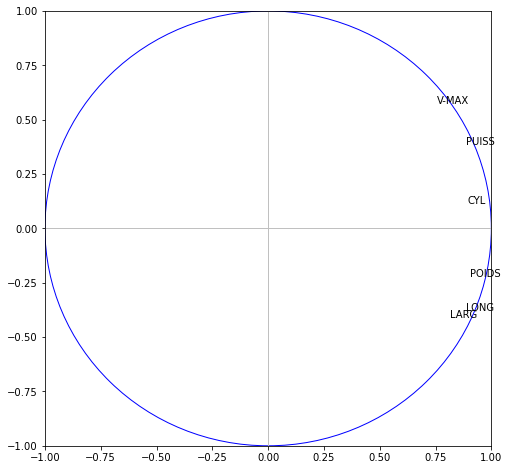

In [32]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

ce cercle permet de visualiser l'importance des variables,

d'expliquer le poids de celle ci sur nos 2 indvidus: toyota corolla et renault 30

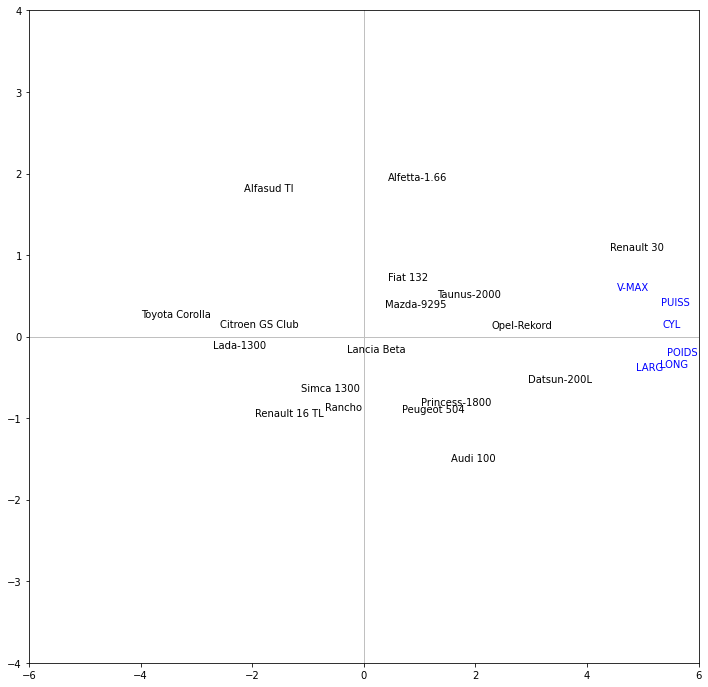

In [59]:

#positionnement des individus dans lepremier plan
fig, axes = plt.subplots(figsize=(12,12))

axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-4,4) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
    
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0]*6,corvar[j,1]),color='b')

    
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

sur ce graphique on visualise bien le fait:

que la renault30 est une voiture avec un fort V-MAX

que l'a toyota à l'inverse à la plus faible puissance de tous le jeu de données

que la datsun est une grande voiture tres lourde

In [33]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

      id    COS2_1    COS2_2
0    CYL  0.798277  0.013203
1  PUISS  0.786517  0.147986
2   LONG  0.785270  0.145183
3   LARG  0.661841  0.170351
4  POIDS  0.819364  0.050415
5  V-MAX  0.569588  0.328925


In [34]:
# contribution des variables aux axes

#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

      id     CTR_1     CTR_2
0    CYL  0.180571  0.015423
1  PUISS  0.177911  0.172868
2   LONG  0.177628  0.169594
3   LARG  0.149709  0.198994
4  POIDS  0.185341  0.058892
5  V-MAX  0.128841  0.384230


## Traitement

### Ajout d'individus

In [35]:
indSupp = pd.DataFrame(np.array([[2664,136,472,177,1410,180 ],
                                 [1288,74,414,157,915,160]]),
                        columns=['CYL', 'PUISS', 'LONG','LARG','POIDS','V-MAX'],
                      index = ['Peugeot 604', 'Peugeot 304 S'])

In [36]:
#centrage-réduction avec les paramètres des individus actifs
ZIndSupp = scaler.transform(indSupp)
print(ZIndSupp)

[[ 2.84080623  2.59511201  1.79199036  2.0010414   2.48812166  1.84112668]
 [-0.94571238 -0.53585556 -0.90763148 -1.87194195 -1.23091273  0.14597168]]


In [37]:
#projection dans l'espace factoriel
coordSupp = pca.transform(ZIndSupp)
print(coordSupp)

[[ 5.56329226  0.33860928 -0.46428878  0.40214608 -0.38981076 -0.08102064]
 [-2.21224139  1.25777905 -0.09304388 -0.35370189  0.648528    0.12473042]]


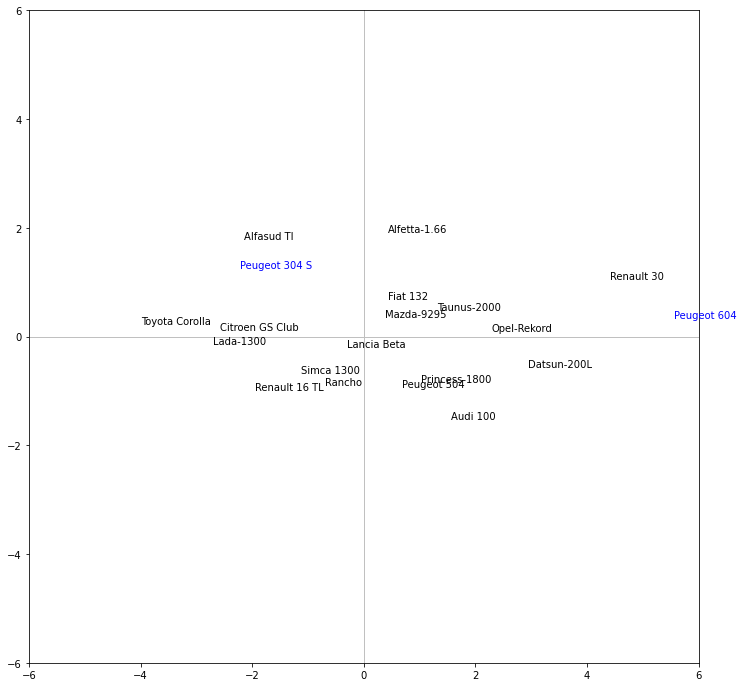

In [38]:
# positionnement des individus supplémentaires dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#étiquette des points actifs
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))

#étiquette des points supplémentaires (illustratifs)en bleu ‘b’
for i in range(coordSupp.shape[0]):
    plt.annotate(indSupp.index[i],(coordSupp[i,0],coordSupp[i,1]),color='b')
    
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

### Ajout de variables quantitative

In [39]:
df = pd.read_excel("../data/initial_data.xls", sheet_name = 0, header = 0, index_col = 0)

In [40]:
df.columns

Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'V-MAX', 'FINITION', 'PRIX',
       'R-POID.PUIS'],
      dtype='object')

In [41]:
varSupp =df[['PRIX','R-POID.PUIS']]

In [42]:
#Nous récupérons ces variables quantitatives dans une structure à part
vsQuanti = varSupp.iloc[:,:2].values
print(vsQuanti)

[[3.05700000e+04 1.10126582e+01]
 [3.99900000e+04 1.30588235e+01]
 [2.96000000e+04 1.54411765e+01]
 [2.82500000e+04 1.57627119e+01]
 [3.49000000e+04 1.12755102e+01]
 [3.54800000e+04 1.31707317e+01]
 [3.23000000e+04 1.46835443e+01]
 [3.20000000e+04 1.83636364e+01]
 [4.77000000e+04 1.03125000e+01]
 [2.65400000e+04 1.48181818e+01]
 [4.23950000e+04 9.72477064e+00]
 [3.39900000e+04 1.41463415e+01]
 [4.39800000e+04 1.19130435e+01]
 [3.50100000e+04 1.10204082e+01]
 [3.94500000e+04 1.41125000e+01]
 [2.79000000e+04 1.31927711e+01]
 [3.27000000e+04 1.12000000e+01]
 [2.21000000e+04 1.40441176e+01]]


In [43]:
#corrélation avec les axes factoriels
corSupp = np.zeros((vsQuanti.shape[1],p))
for k in range(p):
    for j in range(vsQuanti.shape[1]):
        corSupp[j,k] = np.corrcoef(vsQuanti[:,j],coord[:,k])[0,1]

#affichage des corrélations avec les axes
print(corSupp)

[[ 0.77247524  0.08670844 -0.13389277 -0.22582891 -0.15944978 -0.10254878]
 [-0.58903888 -0.67254512 -0.15017616  0.21365718  0.10162791  0.28999742]]


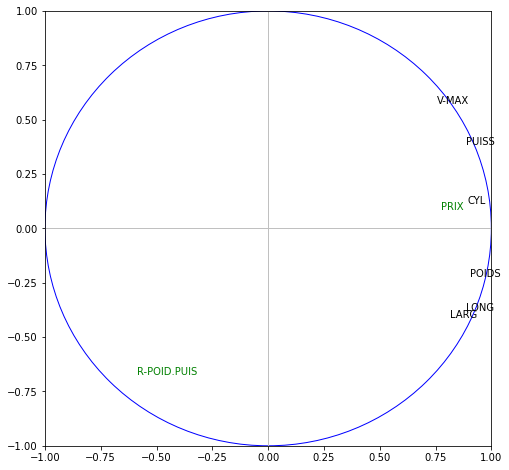

In [44]:
#cercle des corrélations avec les var. supp
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#variables illustratives
for j in range(vsQuanti.shape[1]):
    plt.annotate(varSupp.columns[j],(corSupp[j,0],corSupp[j,1]),color='g')
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

### Ajout de variable qualitative

In [45]:
#traitement de var. quali supplémentaire
vsQuali = df['FINITION']

In [46]:
#modalités de la variable qualitative
modalites = np.unique(vsQuali)
print(modalites)

['B' 'M' 'TB']


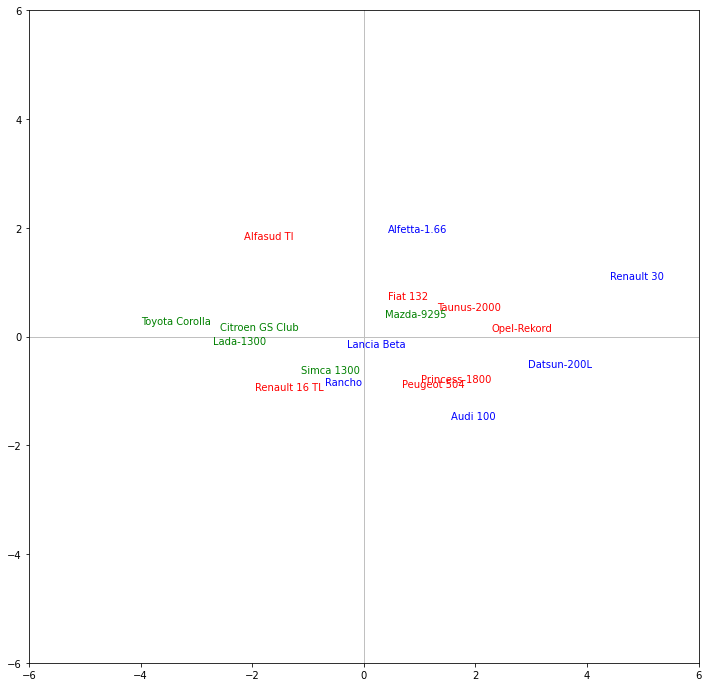

In [47]:
#liste des couleurs
couleurs = ['r','g','b']

#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
    #numéro des individus concernés
    numero = np.where(vsQuali == modalites[c])
    
    #les passer en revue pour affichage
    for i in numero[0]:plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])
        
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

on peut observer que:

les voitures avec une finition "M" (vert) ne sont pas des voitures puissantes

les voitures avec une finition "B" (rouge) sont dans l'ensemble des voitures "moyennes"

les voitures les plus puissantes ont une finition "TB" (bleu)


In [48]:
#structure intermédiaire
df2 = pd.DataFrame({'Finition':vsQuali,'F1':coord[:,0],'F2':coord[:,1]})

In [49]:
#puis calculer les moyennes conditionnelles
print(df2.pivot_table(index='Finition',values=['F1','F2'],aggfunc=pd.Series.mean))

                F1        F2
Finition                    
B         0.235313  0.045271
M        -2.000355 -0.022579
TB        1.392430 -0.034001
